<a href="https://colab.research.google.com/github/PSLeon24/Artificial_Intelligence/blob/main/CNN_CIFAR_10_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 170498071/170498071 [00:15<00:00, 10856220.36it/s]


Extracting ./cifar-10-python.tar.gz to .
Files already downloaded and verified


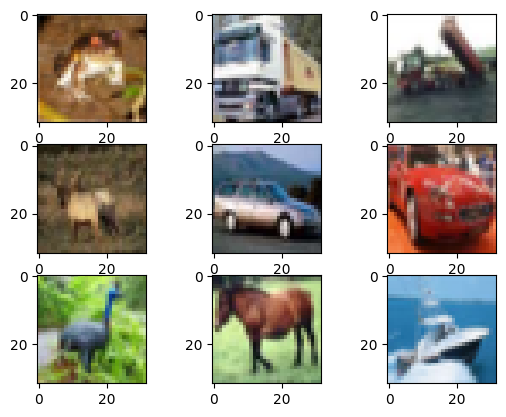

In [1]:
import matplotlib.pyplot as plt

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import ToTensor

training_data = CIFAR10(
    root = "./",
    train = True,
    download = True,
    transform = ToTensor()
)

test_data = CIFAR10(
    root = "./",
    train = False,
    download = True,
    transform = ToTensor()
)

for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.imshow(training_data.data[i])

plt.show()

Files already downloaded and verified
Files already downloaded and verified


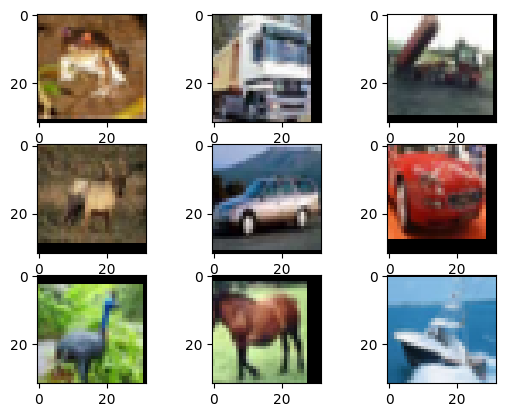

In [3]:
# Data Augmentation
import torchvision.transforms as T

from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop

transforms = Compose([
    T.ToPILImage(),
    RandomCrop((32, 32), padding = 4), # 랜덤으로 이미지 일부 제거 후 패딩
    RandomHorizontalFlip(p = 0.5) # y축 기준으로 대칭
])

training_data = CIFAR10(
    root = "./",
    train = True,
    download = True,
    transform = transforms
)

test_data = CIFAR10(
    root = "./",
    train = False,
    download = True,
    transform = transforms
)

for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.imshow(transforms(training_data.data[i]))

plt.show()

Files already downloaded and verified
Files already downloaded and verified


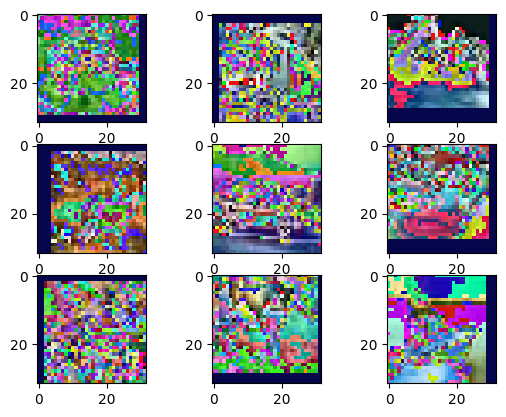

In [4]:
# Normalization

from torchvision.transforms import Normalize

transforms = Compose([
    T.ToPILImage(),
    RandomCrop((32, 32), padding = 4),
    RandomHorizontalFlip(p = 0.5),
    T.ToTensor(),

    Normalize(mean = (0.4914, 0.4822, 0.4465), std = (0.247, 0.243, 0.261)),
    T.ToPILImage()
])

training_data = CIFAR10(
    root = "./",
    train = True,
    download = True,
    transform = transforms
)

test_data = CIFAR10(
    root = "./",
    train = False,
    download = True,
    transform = transforms
)

for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.imshow(transforms(training_data.data[i]))

plt.show()

In [5]:
# How to find mean and std?

import torch

training_data = CIFAR10(
    root = "./",
    train = True,
    download = True,
    transform = ToTensor()
)

# item[0]: image, item[1]: label

imgs = [item[0] for item in training_data]
imgs = torch.stack(imgs, dim = 0).numpy()

mean_r = imgs[:, 0, :, :].mean()
mean_g = imgs[:, 1, :, :].mean()
mean_b = imgs[:, 2, :, :].mean()
print(mean_r, mean_g, mean_b)

std_r = imgs[:, 0, :, :].std()
std_g = imgs[:, 1, :, :].std()
std_b = imgs[:, 2, :, :].std()
print(std_r, std_g, std_b)

Files already downloaded and verified
0.49139968 0.48215827 0.44653124
0.24703233 0.24348505 0.26158768


In [6]:
import torch.nn as nn

class BasicBlock(nn.Module):
  def __init__(self, in_channels, out_channels, hidden_dim):
    super(BasicBlock, self).__init__()

    self.conv1 = nn.Conv2d(in_channels, hidden_dim, kernel_size = 3, padding = 1)
    self.conv2 = nn.Conv2d(hidden_dim, out_channels, kernel_size = 3, padding = 1)
    self.relu = nn.ReLU()

    self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)

  def forward(self, x):
    x = self.conv1(x)
    x = self.relu(x)
    x = self.conv2(x)
    x = self.relu(x)
    x = self.pool(x)

    return x

In [7]:
class CNN(nn.Module):
  def __init__(self, num_classes):
    super(CNN, self).__init__()

    self.block1 = BasicBlock(in_channels = 3, out_channels = 32, hidden_dim = 16)
    self.block2 = BasicBlock(in_channels = 32, out_channels = 128, hidden_dim = 64)
    self.block3 = BasicBlock(in_channels = 128, out_channels = 256, hidden_dim = 128)

    self.fc1 = nn.Linear(in_features = 4096, out_features = 2048)
    self.fc2 = nn.Linear(in_features = 2048, out_features = 256)
    self.fc3 = nn.Linear(in_features = 256, out_features = num_classes)

    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.block1(x)
    x = self.block2(x)
    x = self.block3(x)
    x = torch.flatten(x, start_dim = 1)

    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc3(x)

    return x

In [12]:
transforms = Compose([
    RandomCrop((32, 32), padding = 4),
    RandomHorizontalFlip(p = 0.5),
    T.ToTensor(),
])

training_data = CIFAR10(
    root = "./",
    train = True,
    download = True,
    transform = transforms
)

test_data = CIFAR10(
    root = "./",
    train = False,
    download = True,
    transform = transforms
)

Files already downloaded and verified
Files already downloaded and verified


In [13]:
from torch.utils.data.dataloader import DataLoader

train_loader = DataLoader(training_data, batch_size = 32, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 32, shuffle = True)

device = "cuda" if torch.cuda.is_available() else "cpu"

model = CNN(num_classes = 10)

model.to(device)

CNN(
  (block1): BasicBlock(
    (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): BasicBlock(
    (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block3): BasicBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=4096, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=256,

In [14]:
from torch.optim.adam import Adam

lr = 1e-3

optim = Adam(model.parameters(), lr = lr)

for epoch in range(100):
  for data, label in train_loader:
    optim.zero_grad()

    preds = model(data.to(device))

    loss = nn.CrossEntropyLoss()(preds, label.to(device))
    loss.backward()
    optim.step()

  if epoch == 0 or epoch % 10 == 9:
    print(f"epoch {epoch + 1}, loss: {loss.item()}")

    torch.save(model.state_dict(), "CIFAR.pth")

epoch 1, loss: 1.8780580759048462
epoch 10, loss: 0.6887004971504211
epoch 20, loss: 0.5708019137382507
epoch 30, loss: 0.8946631550788879


KeyboardInterrupt: 

In [18]:
# Evaluation on the model

model.load_state_dict(torch.load("CIFAR.pth", map_location = device))

num_corr = 0

with torch.no_grad():
  for data, label in test_loader:

    output = model(data.to(device))
    preds = output.data.max(1)[1]
    corr = preds.eq(label.to(device).data).sum().item()
    num_corr += corr

  print(f"Accuracy: {num_corr / len(test_data)}")

Accuracy: 0.7854
